In [1]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd

df1 = pd.read_csv('titanic.csv')
df1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df1.head()
    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.shape

(891, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
col=df1.columns
print(col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

AxesSubplot(0.125,0.125;0.62x0.755)


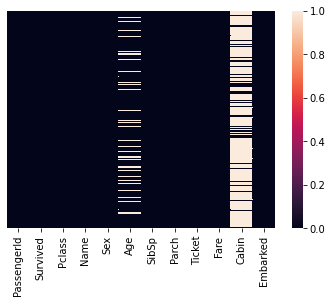

In [ ]:
#heat map
print(sns.heatmap(df1.isnull(),yticklabels=False))#most null values are in age and cabin

In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

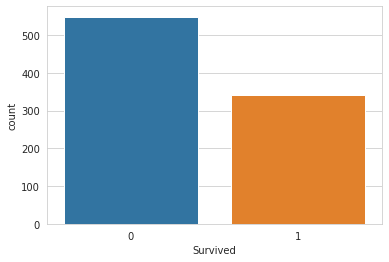

In [ ]:
#plot survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df1)
#around 550 died and around 350 survived

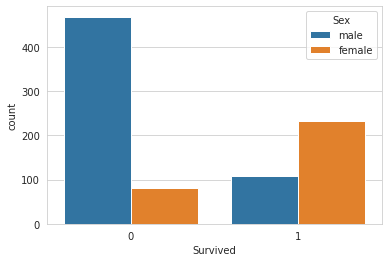

In [ ]:
#We are  taking survived column again and owbserving how many males and females have survived and died
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df1)

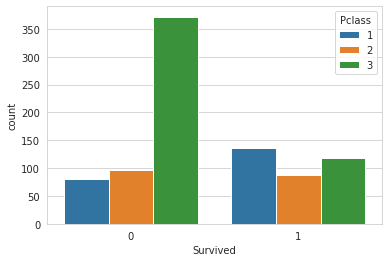

In [ ]:
#based on passenger class how people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


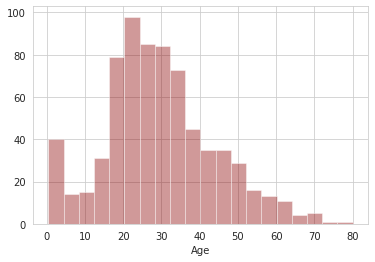

In [ ]:
#histogram
sns.distplot(df1['Age'].dropna(),kde=False,color='darkred')
#ppl b/W age 20 to 30 travelled more
#b/W 70 to 80 Was the least



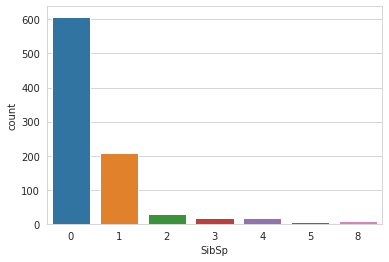

In [ ]:
#find hoW many ppl travelled With sibling and spouse 
sns.countplot(x='SibSp',data=df1)


In [5]:
age_mean= df1['Age'].mean()
age_mean

29.69911764705882

In [6]:
df1['Age']=df1['Age'].fillna(age_mean)
print(df1['Age']) 
df1['Age'].isnull().any()

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


False

In [7]:
df1['Cabin']=df1['Cabin'].fillna(method='bfill')#ffill,pad
print(df1['Cabin']) 
df1['Cabin'].isnull().any()

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


True

In [8]:
df1['Cabin'].isnull().sum()

1

In [9]:
df1['Embarked']=df1['Embarked'].fillna('C')
df1['Embarked'].isnull().any()

False

In [10]:
#label encoding
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
df1['Embarked']=le.fit_transform(df1['Embarked'])
df1['Embarked']
df1['Embarked'].unique()

array([2, 0, 1])

In [11]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C85,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C123,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C148,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0


In [12]:
df1=df1.drop(['Name','PassengerId','Ticket','Embarked'],axis=1)



In [ ]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN
887,1,1,female,19.0,0,0,30.0000,B42
888,0,3,female,NaN,1,2,23.4500,NaN
889,1,1,male,26.0,0,0,30.0000,C148


In [13]:
df1=df1.drop(['Cabin'],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [14]:
from sklearn import preprocessing 
df1=pd.get_dummies(df1,columns=['Sex'])
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.699118,1,2,23.4500,1,0
889,1,1,26.000000,0,0,30.0000,0,1


In [16]:
#train test split
from sklearn.model_selection import train_test_split

x=df1[['Pclass','Sex_female','Sex_male','Age','SibSp','Parch','Fare']]
y=df1['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape

(712, 7)

In [18]:
y_train.shape

(712,)

In [19]:
x_test.shape

(179, 7)

In [20]:
y_test.shape

(179,)

In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))


0.8100558659217877


In [ ]:
print(predictions)

In [ ]:
print(y_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
#svm
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

ypred = model.predict(x_test)
print(accuracy_score(y_test,ypred))

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


predilogreg = model.predict(x_test)
print(accuracy_score(y_test, predilogreg))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier()#launch model
modelknn.fit(x_train,y_train)#train model
predictionknn = modelknn.predict(x_test)#test
accuracy_score(y_test,predictionknn)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

yprednaive = model.predict(x_test)
print(accuracy_score(y_test,yprednaive))

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

ypredxg = model.predict(x_test)
print(accuracy_score(y_test,ypredxg))

In [ ]:
#model.predict([])